# k-means Clustering

## 1. $k$-means Clustering

* $k$-means 군집(clustering)은 간단하고 널리 사용하는 군집 알고리즘
* $k$-means 는 데이터의 어떤 영역을 대표하는 **클러스터 중심**<sup>cluster center</sup>을 찾음
    1. 데이터 포인트를 가장 가까운 클러스터 중심에 할당하고, 
    2. 그런 다음 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정
    3. 1 ~ 2 번을 반복하다가 데이터 포인트에 변화가 없을 때 알고리즘은 종료됨

In [6]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

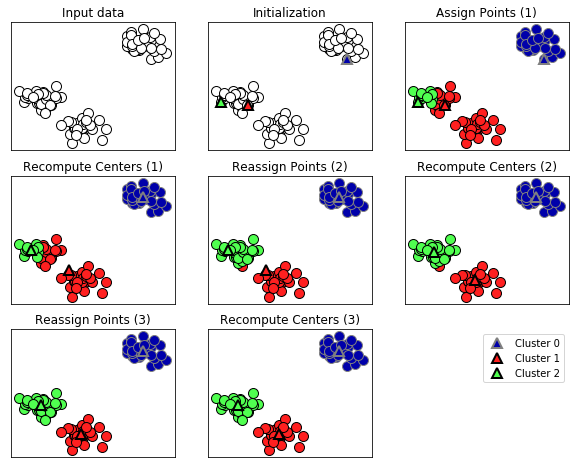

In [2]:
# 예시용 데이터 셋에 k-means 클러스터링 적용
mglearn.plots.plot_kmeans_algorithm()

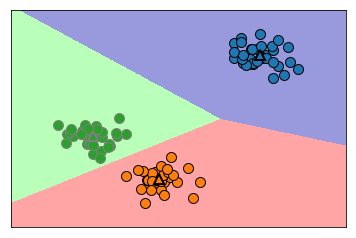

In [3]:
# 학습시킨 클러스터 중심의 경계
mglearn.plots.plot_kmeans_boundaries()

## 2. sklearn.cluster.[KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

*class* `sklearn.cluster.KMeans`*(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm=’auto’)*

### Parameters
* **n_clusters** : int, optional, default: 8
    * 군집 개수를 지정하는 parameter
    * 생성할 Centroid 개수를 정하는 것과 같은 의미

* **init** : {'k-means++', 'random' or and ndarray}
    * Method for initialization, defaults to ‘k-means++’:
    * ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.

### $k$-means example

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
# 인위적으로 2차원 데이터를 생성
X, y = make_blobs(random_state=1)

# Clustering 모델을 만듬
kmeans = KMeans(n_clusters=3).fit(X)

* 알고리즘을 적용하면 X의 각 훈련 데이터 포엔트에 클러스터 레이블이 할당됨

In [3]:
print("클러스터 레이블: \n{}".format(kmeans.labels_))

클러스터 레이블: 
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


* `predict()`를 이용해 새로운 데이터의 클래스 레이블을 예측할 수 있음

In [4]:
print(kmeans.predict(X))

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


* **Unsupervised-learning**에서의 Clustering은 Supervised-learning 처럼 정답이 정해진 Class가 아니므로 Class 번호, 즉 레이블 자체에 의미가 있지 않음

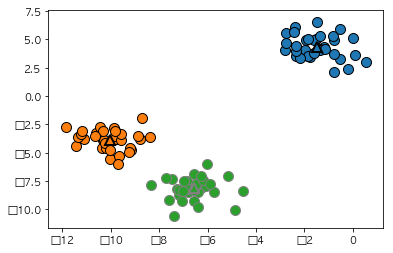

In [7]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

* 클러스터링 개수 (n_clusters)를 늘리거나 줄일 경우 

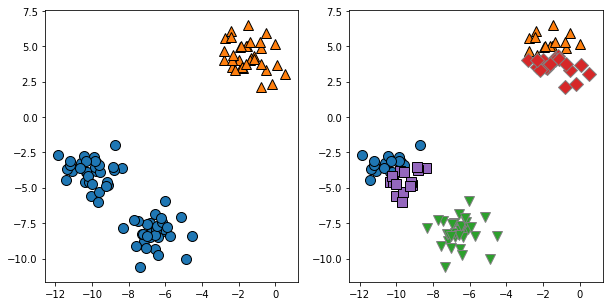

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

## 3. $k$-means 알고리즘이 실패하는 경우
* 데이터셋의 클러스터 개수(n_clusters)를 정확하게 알고 있다하더라도 $k$-means 알고리즘이 항상 잘 구분해낼 수 있는 것은 아님
* $k$-means는 모든 클러스터의 반경(지름)이 똑같다고 가정하기 때문에 클러스터 중심 사이의 정확히 중간에 경계를 그림

Text(0,0.5,'Feature 1')

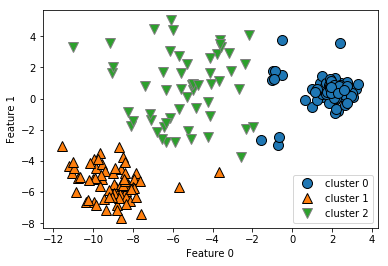

In [11]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
# plt.title("클러스터의 밀도가 다를 때 $k$-means로 찾은 클러스터링")
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### $k$-means의 성능이 나쁜 예 -1 

Text(0,0.5,'Feature 1')

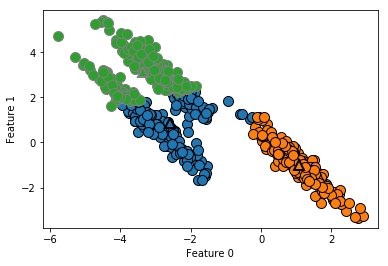

In [13]:
# 무작위로 클러스터 데이터를 생성
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용
kmeans = KMeans(n_clusters=3).fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타냄
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### $k$-means의 성능이 나쁜 예 - 2

Text(0,0.5,'Feature 1')

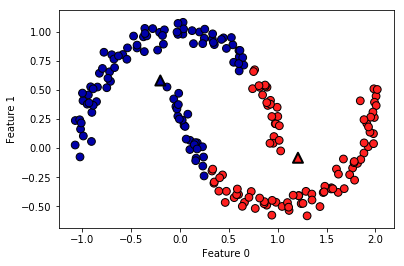

In [16]:
# two_moons 데이터를 생성
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용
kmeans = KMeans(n_clusters=2).fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## 4. 벡터 양자화 또는 분해 메서드로써의 $k$-means

* $k-$means는 클러스터 중심으로 각 데이터 포인트를 표현함
* 각 데이터 포인트가 클러스터 중심, 즉 하나의 성분으로 표현된다고 볼 수 있음
* $k$-means를 각 포인트가 하나의 성분으로 분해되는 관점으로 보는 것을 **벡터 양자화**<sup>vector quantization</sup> 라고 함

In [19]:
# LFW 데이터셋은 http://vis-www.cs.umass.edu/lfw 참고
# 시간이 조금 소요됨
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

'''
* 사람마다 최대 50개의 이미지를 선택
* 50개 미만인 사람은 전체 선택
* 50개 초과하는 사람은 50개만 선택하고 나머지는 버림(True, False)
'''
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
#     print(mask[np.where(people.target == target)[0]])
  
X_people = people.data[mask] # 얼굴 이미지 데이터
y_people = people.target[mask] # 얼굴 레이블

# print(people.data[[True, False]])

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 사이로 스케일 조정
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 동일
X_people = X_people / 255.

# print("np.unique(people.target):\n{}".format(np.unique(people.target)))
print()

In [26]:
from sklearn.decomposition import PCA, NMF

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, 
                                                    stratify=y_people, random_state=0)

nmf = NMF(n_components=100, random_state=0).fit(X_train)
pca = PCA(n_components=100, random_state=0).fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0).fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]

Text(0,0.5,'nmf')

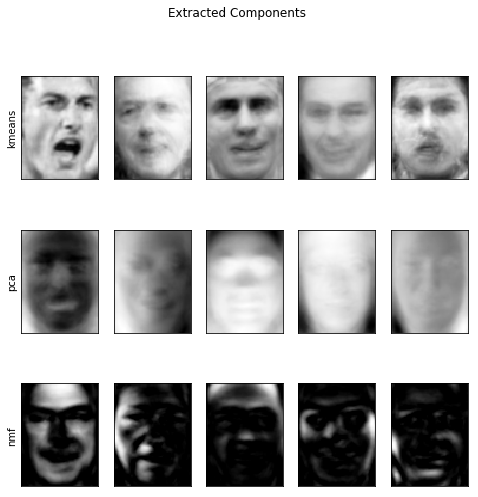

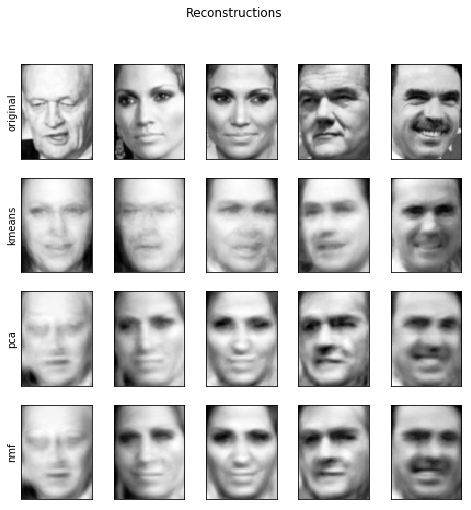

In [31]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape), cmap='Greys_r')
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='Greys_r')
    ax[2].imshow(comp_nmf.reshape(image_shape), cmap='Greys_r')

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape), cmap='Greys_r')
    ax[1].imshow(rec_kmeans.reshape(image_shape), cmap='Greys_r')
    ax[2].imshow(rec_pca.reshape(image_shape), cmap='Greys_r')
    ax[3].imshow(rec_nmf.reshape(image_shape), cmap='Greys_r')

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

Cluster memberships:
[3 6 5 4 6 0 3 2 3 2 1 9 6 2 8 3 7 9 7 8 0 2 7 2 1 5 6 0 5 1 3 1 2 5 7 0 9
 3 8 5 9 8 7 5 6 1 3 8 5 2 8 9 0 4 2 7 7 2 7 1 9 4 6 3 2 4 1 6 1 4 9 4 9 5
 2 4 5 3 7 9 0 1 9 0 5 1 3 1 9 0 7 3 0 8 0 6 6 9 4 5 2 0 1 3 4 5 4 1 6 7 8
 1 1 4 3 6 7 0 9 3 3 8 5 1 5 8 3 5 2 0 3 8 4 9 2 6 2 4 0 3 5 5 7 1 1 3 5 2
 7 5 9 6 3 7 9 1 2 9 7 7 5 2 7 6 9 6 7 9 6 2 7 4 4 8 5 2 0 8 8 7 6 4 0 6 0
 7 1 2 4 8 4 7 3 3 5 8 0 5 1 6]


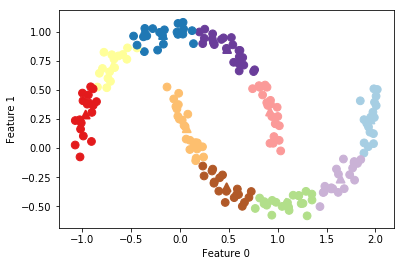

In [35]:
# two_moons 데이터를 생성
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용
kmeans = KMeans(n_clusters=10).fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

## 5. 정리

### 1) $k$-means Clustering의 장점
* 비교적 이해하기 쉽고, 구현과 속도가 빠름
* 대용량 데이터셋에서도 잘 작동하지만 scikit-learn에서 아주 큰 대규모 데이터셋을 처리할 수 있는 [MiniBatchKMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans)를 제공

### 2) $k$-means Clustering의 단점
* 랜덤하게 초기화를 하기때문에 알고리즘의 출력이 난수 초기값에 따라 달라질 수 있음
* 기본적으로 scikit-learn은 서로 다른 난수 초기값으로 10번 반복하여 가장 좋은 결과를 만듬
* 클러스터의 모양을 가정하고 있어(원형 모양) 활용범위가 제한적임
* 사용자가 클러스터의 개수를 지정해야함 $\rightarrow$ 실제로는 몇개인지 알 수 없음